In [26]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson

# PART 1

1A.  Joint Probablity of people who planned to purchase and purchased the product 
p = 400/2000 = 1/5

1B. Probablity people who planned to purchase and actually purchased 
p = 400/600 = 3/2

-----------------------------------------------------------------------------------

2.A. The probability that none of the items are defective is 0.5987.

2.B. The probability that exactly one of the items is defective is 0.3151.

2.C. The probability that two or fewer of the items are defective is 0.9885.

2.D. The probability that three or more of the items are defective is 0.0115.

3A. The probability that in a given week he will sell some cars is 0.950212931632136
3B. The probability that in a given week he will sell 2 or more but less than 5 cars is 0.6161149710523164
3C. Poisson Distribution of Cars Sold Per Week


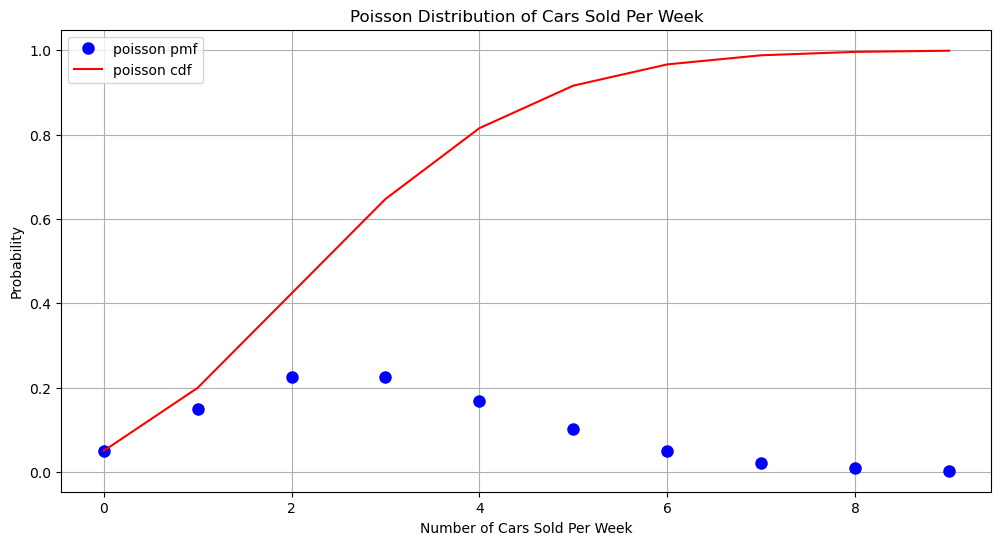

In [8]:
lambda_ = 3

def poisson_probability(lambda_, x):
    return (lambda_**x * math.exp(-lambda_)) / math.factorial(x)

probability_0 = poisson_probability(lambda_, 0)
probability_some = 1 - probability_0

probability_2 = poisson_probability(lambda_, 2)
probability_3 = poisson_probability(lambda_, 3)
probability_4 = poisson_probability(lambda_, 4)

probability_2_to_4 = probability_2 + probability_3 + probability_4
print(f"3A. The probability that in a given week he will sell some cars is {probability_some}")
print(f"3B. The probability that in a given week he will sell 2 or more but less than 5 cars is {probability_2_to_4}")
print(f"3C. Poisson Distribution of Cars Sold Per Week")

mu = 3
x = np.arange(0, 10, 1)
pmf = poisson.pmf(x, mu)
cdf = poisson.cdf(x, mu)

# Plot the PMF and CDF
plt.figure(figsize=(12, 6))
plt.plot(x, pmf, 'bo', ms=8, label='poisson pmf')
plt.plot(x, cdf, 'r-', ms=8, label='poisson cdf')
plt.title('Poisson Distribution of Cars Sold Per Week')
plt.xlabel('Number of Cars Sold Per Week')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

4.A. The probability that all three orders will be recognised correctly : 0.654 or 65.4%.

4.B. The probability that none of the three orders will be recognised correctly : 0.002 or 0.2%.

4.C. The probability that at least two of the three orders will be recognised correctly : 0.953 or 95.3%.

# PART 2

### Data Cleaning

In [159]:
#1 Read CSV 
df = pd.read_csv("Basketball.csv")
print(df.head().T,'\n')
print(df.tail().T,'\n')

# drop the last row as it dont have any significant data
df.drop(60, inplace=True)
print(df.tail().T,'\n')

# Pick up the starting year in Team Launch year column
df['TeamLaunch'] = df['TeamLaunch'].str.extract(r'(\d{4})')
df['TeamLaunch'] = pd.to_datetime(df['TeamLaunch'], format='%Y')


                          0       1       2         3       4
Team                 Team 1  Team 2  Team 3    Team 4  Team 5
Tournament               86      86      80        82      86
Score                  4385    4262    3442      3386    3368
PlayedGames            2762    2762    2614      2664    2762
WonGames               1647    1581    1241      1187    1209
DrawnGames              552     573     598       616     633
LostGames               563     608     775       861     920
BasketScored           5947    5900    4534      4398    4631
BasketGiven            3140    3114    3309      3469    3700
TournamentChampion       33      25      10         6       8
Runner-up                23      25       8         6       7
TeamLaunch             1929    1929    1929  1931to32    1929
HighestPositionHeld       1       1       1         1       1 

                          56       57       58       59       60
Team                 Team 57  Team 58  Team 59  Team 60  Team 61


In [168]:
#2 Data Exploration

#A. Check the datatypes of each attribute.
print(df.info(),'\n')

#B. Check for null values in the attributes.
print("Total Null Value :",'\n',df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Team                 60 non-null     object        
 1   Tournament           60 non-null     int64         
 2   Score                60 non-null     int32         
 3   PlayedGames          60 non-null     int32         
 4   WonGames             60 non-null     int32         
 5   DrawnGames           60 non-null     int32         
 6   LostGames            60 non-null     int32         
 7   BasketScored         60 non-null     int32         
 8   BasketGiven          60 non-null     int32         
 9   TournamentChampion   9 non-null      Int64         
 10  Runner-up            13 non-null     Int64         
 11  TeamLaunch           60 non-null     datetime64[ns]
 12  HighestPositionHeld  60 non-null     int64         
dtypes: Int64(2), datetime64[ns](1), int32

In [167]:
# Clean the Data 

# Convert all object types in to int type to use it in plotting
df['Score'] = df['Score'].astype(int)
df['PlayedGames'] = df['PlayedGames'].astype(int)
df['WonGames'] = df['WonGames'].astype(int)
df['DrawnGames'] = df['DrawnGames'].astype(int)
df['LostGames'] = df['LostGames'].astype(int)
df['BasketScored'] = df['BasketScored'].astype(int)
df['BasketGiven'] = df['BasketGiven'].astype(int)

df['TournamentChampion'] = df['TournamentChampion'].replace('-', np.nan)
df['TournamentChampion'] = pd.to_numeric(df['TournamentChampion'], errors='coerce')
df['TournamentChampion'] = df['TournamentChampion'].astype('Int64')

df['Runner-up'] = df['Runner-up'].replace('-', np.nan)
df['Runner-up'] = pd.to_numeric(df['Runner-up'], errors='coerce')
df['Runner-up'] = df['Runner-up'].astype('Int64')

### Univariate Analysis

# PART 3

In [54]:
#1 Read CSV 
df = pd.read_csv("CompanyX_EU.csv")
df.head()

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating


In [55]:
#2 Data Exploration

#A. Check the datatypes of each attribute.
print(df.info(),'\n')

#B. Check for null values in the attributes.
print("Total Null Value :",'\n',df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB
None 

Total Null Value : 
 Startup             0
Product             6
Funding           214
Event               0
Result              0
OperatingState      0
dtype: int64


Startup           0
Product           0
Funding           0
Event             0
Result            0
OperatingState    0
dtype: int64 

Axes(0.125,0.11;0.775x0.77)
Number of outliers: 60 

Frequency of values in the:  OperatingState
Operating    319
Acquired      66
Closed        57
Ipo            4
Name: count, dtype: int64


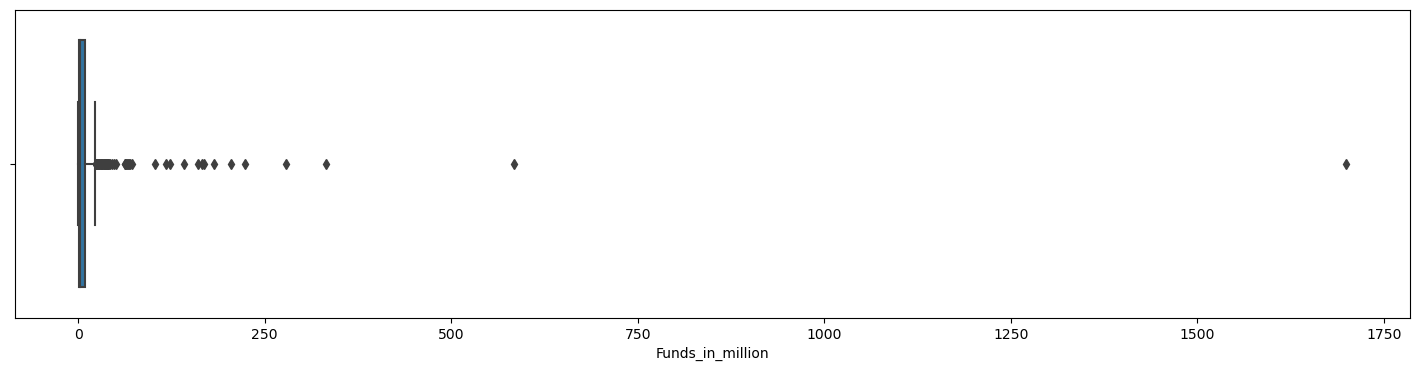

In [56]:
#3 Data preprocessing & visualisation 

#A. Drop the null values.
df = df.dropna()
print(df.isnull().sum(),'\n')

#B. Convert the ‘Funding’ features to a numerical value
df.loc[:,'Funds_in_million'] = df['Funding'].apply(lambda x: float(x[1:-1])/1000 if x[-1] == 'K' else (float(x[1:-1])*1000 if x[-1] == 'B' else float(x[1:-1])))

#C. Plot box plot for funds in million
plt.figure(figsize=(18,4));
print(sns.boxplot(data=df, x='Funds_in_million'));

#D Check the number of outliers greater than the upper fence.
s = df['Funds_in_million']
Q1 = s.quantile(0.25)
Q3 = s.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = s[(s < lower_bound) | (s > upper_bound)]
num_outliers = outliers.count()
print("Number of outliers:", num_outliers,'\n')

#E Check frequency of the Operating State features classes.
frequency = df['OperatingState'].value_counts()
print("Frequency of values in the: ", frequency)

In [74]:
#4 Statistical Analysis :
df.head()

#A Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down
sum_closed = df.loc[df['OperatingState'] == 'Closed', 'Funds_in_million'].sum()
sum_operating = df.loc[df['OperatingState'] == 'Operating', 'Funds_in_million'].sum()
print("A. Funding in Million is greater for Companies which are still operating")
print(sum_closed);
print(sum_operating,'\n');

A. Funding in Million is greater for Companies which are still operating
185.7157
6080.8372 



B. Write the null hypothesis and alternative hypothesis.

Null Hypothesis : The null hypothesis is a statement that there is no significant difference, effect, or relationship between populations, variables, or treatments. It represents the default assumption or status quo and is typically the hypothesis being tested against the alternative hypothesis.

Alternative Hypothesis : The alternative hypothesis is a statement that suggests there is a significant difference, effect, or relationship between populations, variables, or treatments. It represents the researcher's hypothesis or the possibility of an effect that is being investigated and is typically the hypothesis researchers are interested in proving.

C. Test for significance and conclusion

Test for Significance: A statistical test used to determine whether the results of an experiment or study are likely to have occurred by chance or if they are statistically significant. It involves comparing observed data with expected data under the assumption of a null hypothesis. The test calculates a p-value, which indicates the probability of observing the data or more extreme results under the null hypothesis. A small p-value suggests that the observed results are unlikely to have occurred by chance alone, leading to the rejection of the null hypothesis.

Conclusion: In statistics, the conclusion is the decision made based on the results of data analysis and hypothesis testing. It typically involves interpreting the findings in the context of the research question, null hypothesis, alternative hypothesis, and significance level. If the p-value is less than the chosen significance level (e.g., 0.05), the conclusion may involve rejecting the null hypothesis in favor of the alternative hypothesis. If the p-value is greater than the significance level, the null hypothesis may not be rejected, and no significant effect or relationship may be concluded. The conclusion should also consider the practical implications and limitations of the study.

Axes(0.125,0.11;0.775x0.77)


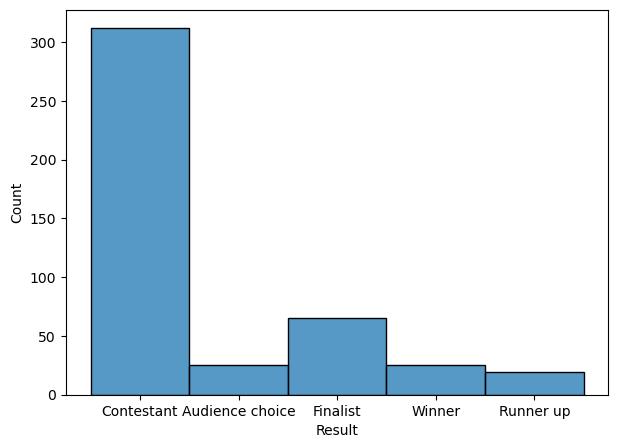

In [80]:
#D. Make a copy of the original data frame. [1 Mark]
df_copy = df.copy()

#E. Check frequency distribution of Result variables.
plt.figure(figsize=(7,5));
print(sns.histplot(data=df, x='Result'));

In [103]:
#F. Calculate percentage of winners that are still operating and percentage of contestants that are still operating
total = df['Result'].shape[0]
winner = df[df['Result'] == 'Winner'].shape[0]
contestant = df[df['Result'] == 'Contestant'].shape[0]
print('Winner that are still operating : ',(winner/total)*(100))
print('Contestant that are still operating : ',(contestant/total)*(100))

Winner that are still operating :  5.605381165919283
Contestant that are still operating :  69.95515695067265


In [110]:
#G. Write your hypothesis comparing the proportion of companies that are operating between winners and contestants:
df.head()
#plt.figure(figsize=(7,5));
#sns.boxenplot(data=df, x='Result',y='Funds_in_million')
#sns.lineplot(data=df , x='Restult' , y='Funds_in_million', errorbar=('ci', False));
#sns.scatterplot(data=df, x='engine_size', y='horsepower', hue='fuel_type', style='fuel_type');
#sns.swarmplot(data=df, x='Result' , y='Funds_in_million');

,Startup,Product,Funding,Event,Result,OperatingState,Funds_in_million
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80


In [114]:
#I. Select only the Event that has ‘disrupt’ keyword from 2013 onwards. [1 Mark]
df['Year'] = df['Event'].str.extract(r'(\d{4})').astype(float)
filtered_df = df[(df['Event'].str.contains('Disrupt')) & (df['Year'] >= 2013)]
filtered_df.shape[0]

193